<a href="https://colab.research.google.com/github/Tusk9/gradprojects/blob/main/TextClassificationAssign5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np    # For array operations
import pandas as pd   # For DataFrames

In [ ]:
df = pd.read_csv("/letters.csv")
print(df.shape)

(42000, 46)


In [ ]:
df.isnull().sum()

label       0
pixel43     0
pixel44     0
pixel92     0
pixel124    0
pixel125    0
pixel126    0
pixel127    0
pixel128    0
pixel129    0
pixel130    0
pixel131    0
pixel132    0
pixel133    0
pixel134    0
pixel135    0
pixel136    0
pixel137    0
pixel138    0
pixel146    0
pixel147    0
pixel148    0
pixel149    0
pixel150    0
pixel151    0
pixel152    0
pixel153    0
pixel154    0
pixel155    0
pixel156    0
pixel157    0
pixel158    0
pixel159    0
pixel160    0
pixel327    0
pixel328    0
pixel329    0
pixel351    0
pixel410    0
pixel411    0
pixel412    0
pixel413    0
pixel414    0
pixel415    0
pixel416    0
pixel417    0
dtype: int64

In [ ]:
df.dtypes

label       int64
pixel43     int64
pixel44     int64
pixel92     int64
pixel124    int64
pixel125    int64
pixel126    int64
pixel127    int64
pixel128    int64
pixel129    int64
pixel130    int64
pixel131    int64
pixel132    int64
pixel133    int64
pixel134    int64
pixel135    int64
pixel136    int64
pixel137    int64
pixel138    int64
pixel146    int64
pixel147    int64
pixel148    int64
pixel149    int64
pixel150    int64
pixel151    int64
pixel152    int64
pixel153    int64
pixel154    int64
pixel155    int64
pixel156    int64
pixel157    int64
pixel158    int64
pixel159    int64
pixel160    int64
pixel327    int64
pixel328    int64
pixel329    int64
pixel351    int64
pixel410    int64
pixel411    int64
pixel412    int64
pixel413    int64
pixel414    int64
pixel415    int64
pixel416    int64
pixel417    int64
dtype: object

In [ ]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
#import imutils
import cv2
import matplotlib.pyplot as plt
import pandas as pd

training data points: 28350
validation data points: 3150
testing data points: 10500
k=1, accuracy=59.78%
k=3, accuracy=61.78%
k=5, accuracy=64.67%
k=7, accuracy=64.79%
k=9, accuracy=64.44%
k=11, accuracy=65.21%
k=13, accuracy=65.46%
k=15, accuracy=65.11%
k=17, accuracy=65.40%
k=19, accuracy=65.43%
k=21, accuracy=64.79%
k=23, accuracy=64.89%
k=25, accuracy=64.92%
k=27, accuracy=64.63%
k=29, accuracy=64.54%
k=13 achieved highest accuracy of 65.46% on validation data
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1048
           1       0.77      0.96      0.85      1208
           2       0.67      0.64      0.66       996
           3       0.59      0.58      0.59      1042
           4       0.73      0.49      0.58      1013
           5       0.71      0.52      0.60       948
           6       0.82      0.88      0.85      1051
           7       0.48      0.61      0.54      1132
           8     

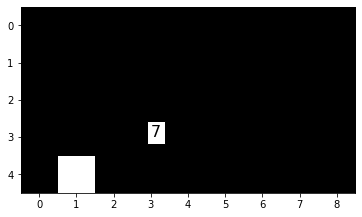

The Digit Could be: 8


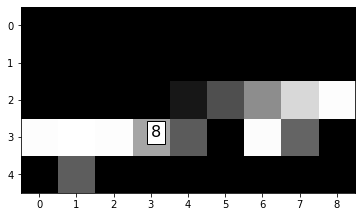

The Digit Could be: 4


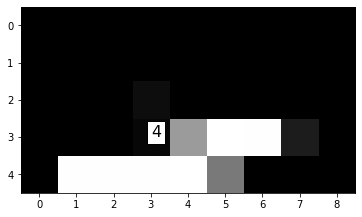

The Digit Could be: 9


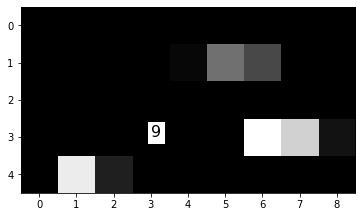

The Digit Could be: 8


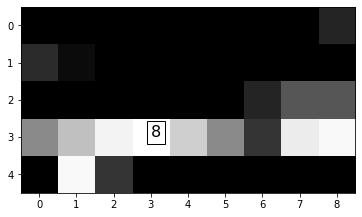

In [ ]:
# take the MNIST data and construct the training and testing split, using 75% of the
# data for training and 25% for testing
target=df.label
dfK=df.drop('label',axis=1)
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(dfK),
 target, test_size=0.25, random_state=42)

# now, let's take 10% of the training data and use that for validation

(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
test_size=0.1, random_state=84)
trainData = tf.keras.utils.normalize(trainData, axis=1) #scalling data between 0 and 1 we can also divide X_train, X_test by 255 to normalize data.
testData = tf.keras.utils.normalize(testData, axis=1)
# show the sizes of each data split

print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k

kVals = range(1, 30, 2)
accuracies = []

# loop over various values of `k` for the k-Nearest Neighbor classifier

for k in range(1, 30, 2):
          # train the k-Nearest Neighbor classifier with the current value of `k`
          model = KNeighborsClassifier(n_neighbors=k)
          model.fit(trainData, trainLabels)
          # evaluate the model and update the accuracies list
          score = model.score(valData, valLabels)
          print("k=%d, accuracy=%.2f%%" % (k, score * 100))
          accuracies.append(score)

# find the value of k that has the largest accuracy

i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
accuracies[i] * 100))

# re-train our classifier using the best k value and predict the labels of the
# test data

model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData, trainLabels)
predictions = model.predict(testData)
#print(predictions[1])

# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits

print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))

print ("Confusion matrix")
print(confusion_matrix(testLabels,predictions))

# loop over a few random digits

for i in np.random.randint(0, high=len(testLabels), size=(5,)):
         # grab the image and classify it
         image = testData[i]
         prediction = model.predict([image])[0]
         # convert the image for a 64-dim array to an 8 x 8 image compatible with OpenCV,
         # then resize it to 32 x 32 pixels so we can see it better
##         image = image.reshape((64, 64))
##         image = exposure.rescale_intensity(image, out_range=(0, 255))
##         image = imutils.resize(image, width=32, inter=cv2.INTER_CUBIC)

         # show the prediction

         imgdata = np.array(image, dtype='float')
         pixels = imgdata.reshape((5,9))
         plt.imshow(pixels,cmap='gray')
         plt.annotate(prediction,(3,3),bbox={'facecolor':'white'},fontsize=16)
         print("The Digit Could be: {}".format(prediction))
         #cv2.imshow("image", image)
         plt.show()
         cv2.waitKey(0)

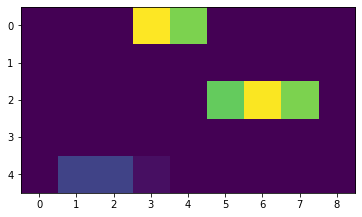

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(trainData[3].reshape((5,9)))
plt.show()

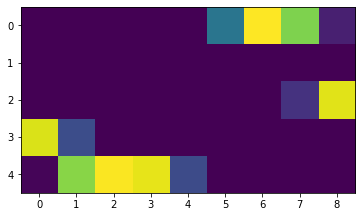

In [ ]:
plt.imshow(trainData[5].reshape((5,9)))

In [ ]:
trainLabels[:10], trainData[:10]

(36759    4
 12260    5
 30012    9
 26538    6
 35189    5
 12482    6
 32865    7
 36492    4
 33348    8
 26421    2
 Name: label, dtype: int64,
 array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.5324808 , 0.        ,
         0.        , 0.        , 0.84619042, 0.02063879, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [ ]:
y = df["label"]

X = df.drop(labels = ["label"],axis = 1)

# Drop 'label' column
X_train = df.drop(labels = ["label"],axis = 1)

X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=104,
                                   test_size=0.25,
                                   shuffle=True)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    3512
7    3287
3    3284
2    3174
0    3142
9    3085
8    3068
6    3056
4    3025
5    2867
Name: label, dtype: int64

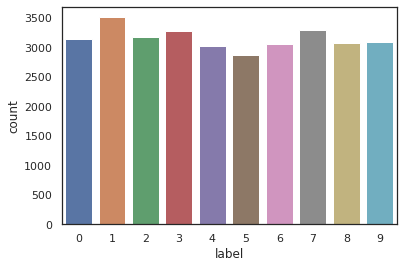

In [ ]:
# free some space

g = sns.countplot(y_train)

y_train.value_counts()

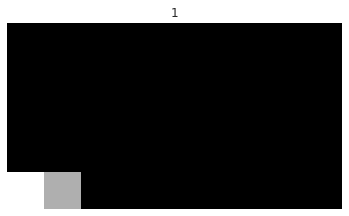

In [ ]:
# plot some samples
img = X_train.iloc[0].to_numpy()
img = img.reshape((5,9))
plt.imshow(img,cmap='gray')
plt.title(df.iloc[0,0])
plt.axis("off")
plt.show()

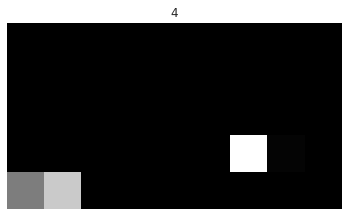

In [ ]:
# plot some samples
img = X_train.iloc[3].to_numpy()
img = img.reshape((5,9))
plt.imshow(img,cmap='gray')
plt.title(df.iloc[3,0])
plt.axis("off")
plt.show()

In [ ]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0
print("x_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

x_train shape:  (31500, 45)
X_test shape:  (10500, 45)


In [ ]:
# Reshape
X_train = X_train.values.reshape(-1,5,9,1)
X_test = X_test.values.reshape(-1,5,9,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",X_test.shape)

x_train shape:  (31500, 5, 9, 1)
test shape:  (10500, 5, 9, 1)


In [ ]:
# Label Encoding
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(y_train, num_classes = 10)

In [ ]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (28350, 5, 9, 1)
x_test shape (3150, 5, 9, 1)
y_train shape (28350, 10)
y_test shape (3150, 10)


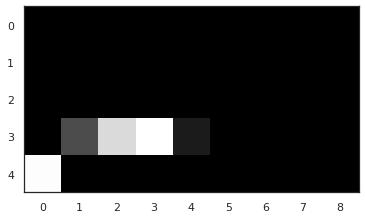

In [ ]:
# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

In [ ]:
#
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (5,9,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
# model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])


model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 5, 9, 8)           208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 4, 8)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 2, 4, 8)           0         
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                        

In [ ]:
#Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
epochs = 25  # for better result increase the epochs
batch_size = 30

In [ ]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [ ]:
#Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/25


<ipython-input-25-d6d52b9c9655>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),


945/945 [==============================] - 17s 17ms/step - loss: 1.6770 - accuracy: 0.3991 - val_loss: 1.2212 - val_accuracy: 0.5749
Epoch 2/25
945/945 [==============================] - 15s 16ms/step - loss: 1.4454 - accuracy: 0.4783 - val_loss: 1.1602 - val_accuracy: 0.5870
Epoch 3/25
945/945 [==============================] - 15s 16ms/step - loss: 1.3827 - accuracy: 0.5011 - val_loss: 1.1374 - val_accuracy: 0.5949
Epoch 4/25
945/945 [==============================] - 16s 17ms/step - loss: 1.3485 - accuracy: 0.5111 - val_loss: 1.1450 - val_accuracy: 0.5984
Epoch 5/25
945/945 [==============================] - 16s 17ms/step - loss: 1.3247 - accuracy: 0.5193 - val_loss: 1.0969 - val_accuracy: 0.6083
Epoch 6/25
945/945 [==============================] - 15s 16ms/step - loss: 1.3035 - accuracy: 0.5295 - val_loss: 1.1083 - val_accuracy: 0.6130
Epoch 7/25
945/945 [==============================] - 15s 15ms/step - loss: 1.2772 - accuracy: 0.5357 - val_loss: 1.0862 - val_accuracy: 0.6083
Epo

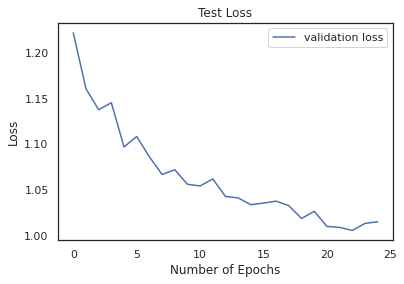

In [ ]:
# Plot the loss and accuracy curves for training and validation
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

99/99 [==============================] - 0s 2ms/step


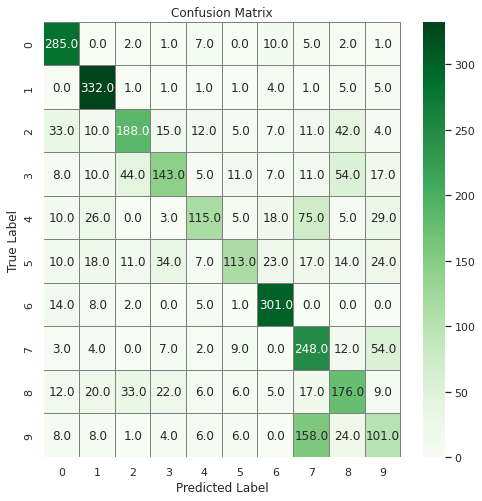

In [ ]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

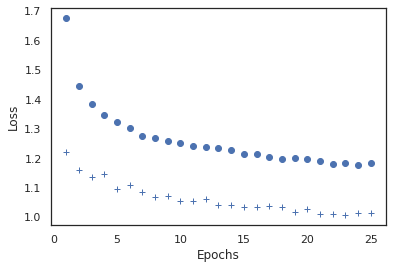

In [ ]:
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

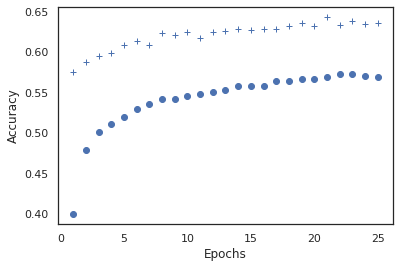

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()